In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, jaccard_score, f1_score, roc_auc_score, roc_curve, auc

# dodane po konsultacjach
from sklearn.metrics import precision_score, recall_score, log_loss, matthews_corrcoef, balanced_accuracy_score, confusion_matrix, fbeta_score

# undersampling
from imblearn.under_sampling import RandomUnderSampler


In [2]:
df = pd.read_csv('lokata.csv', sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
duplicate_rows = df.duplicated().sum()
print(f'Sum of duplicated rows: {duplicate_rows}')

df_clean = df.drop_duplicates()
print(df_clean.dtypes)

Sum of duplicated rows: 12
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [7]:
df_clean['y'] = df_clean['y'].map({'no': 0, 'yes': 1})
df2 = df_clean.copy()

C:\Users\kalin\AppData\Local\Temp\ipykernel_9692\1361703548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['y'] = df_clean['y'].map({'no': 0, 'yes': 1})


job: 0 'unknown'
marital: 0 'unknown'
education: 1557 'unknown'
default: 8212 'unknown'
housing: 0 'unknown'
loan: 0 'unknown'
poutcome: 0 'unknown'


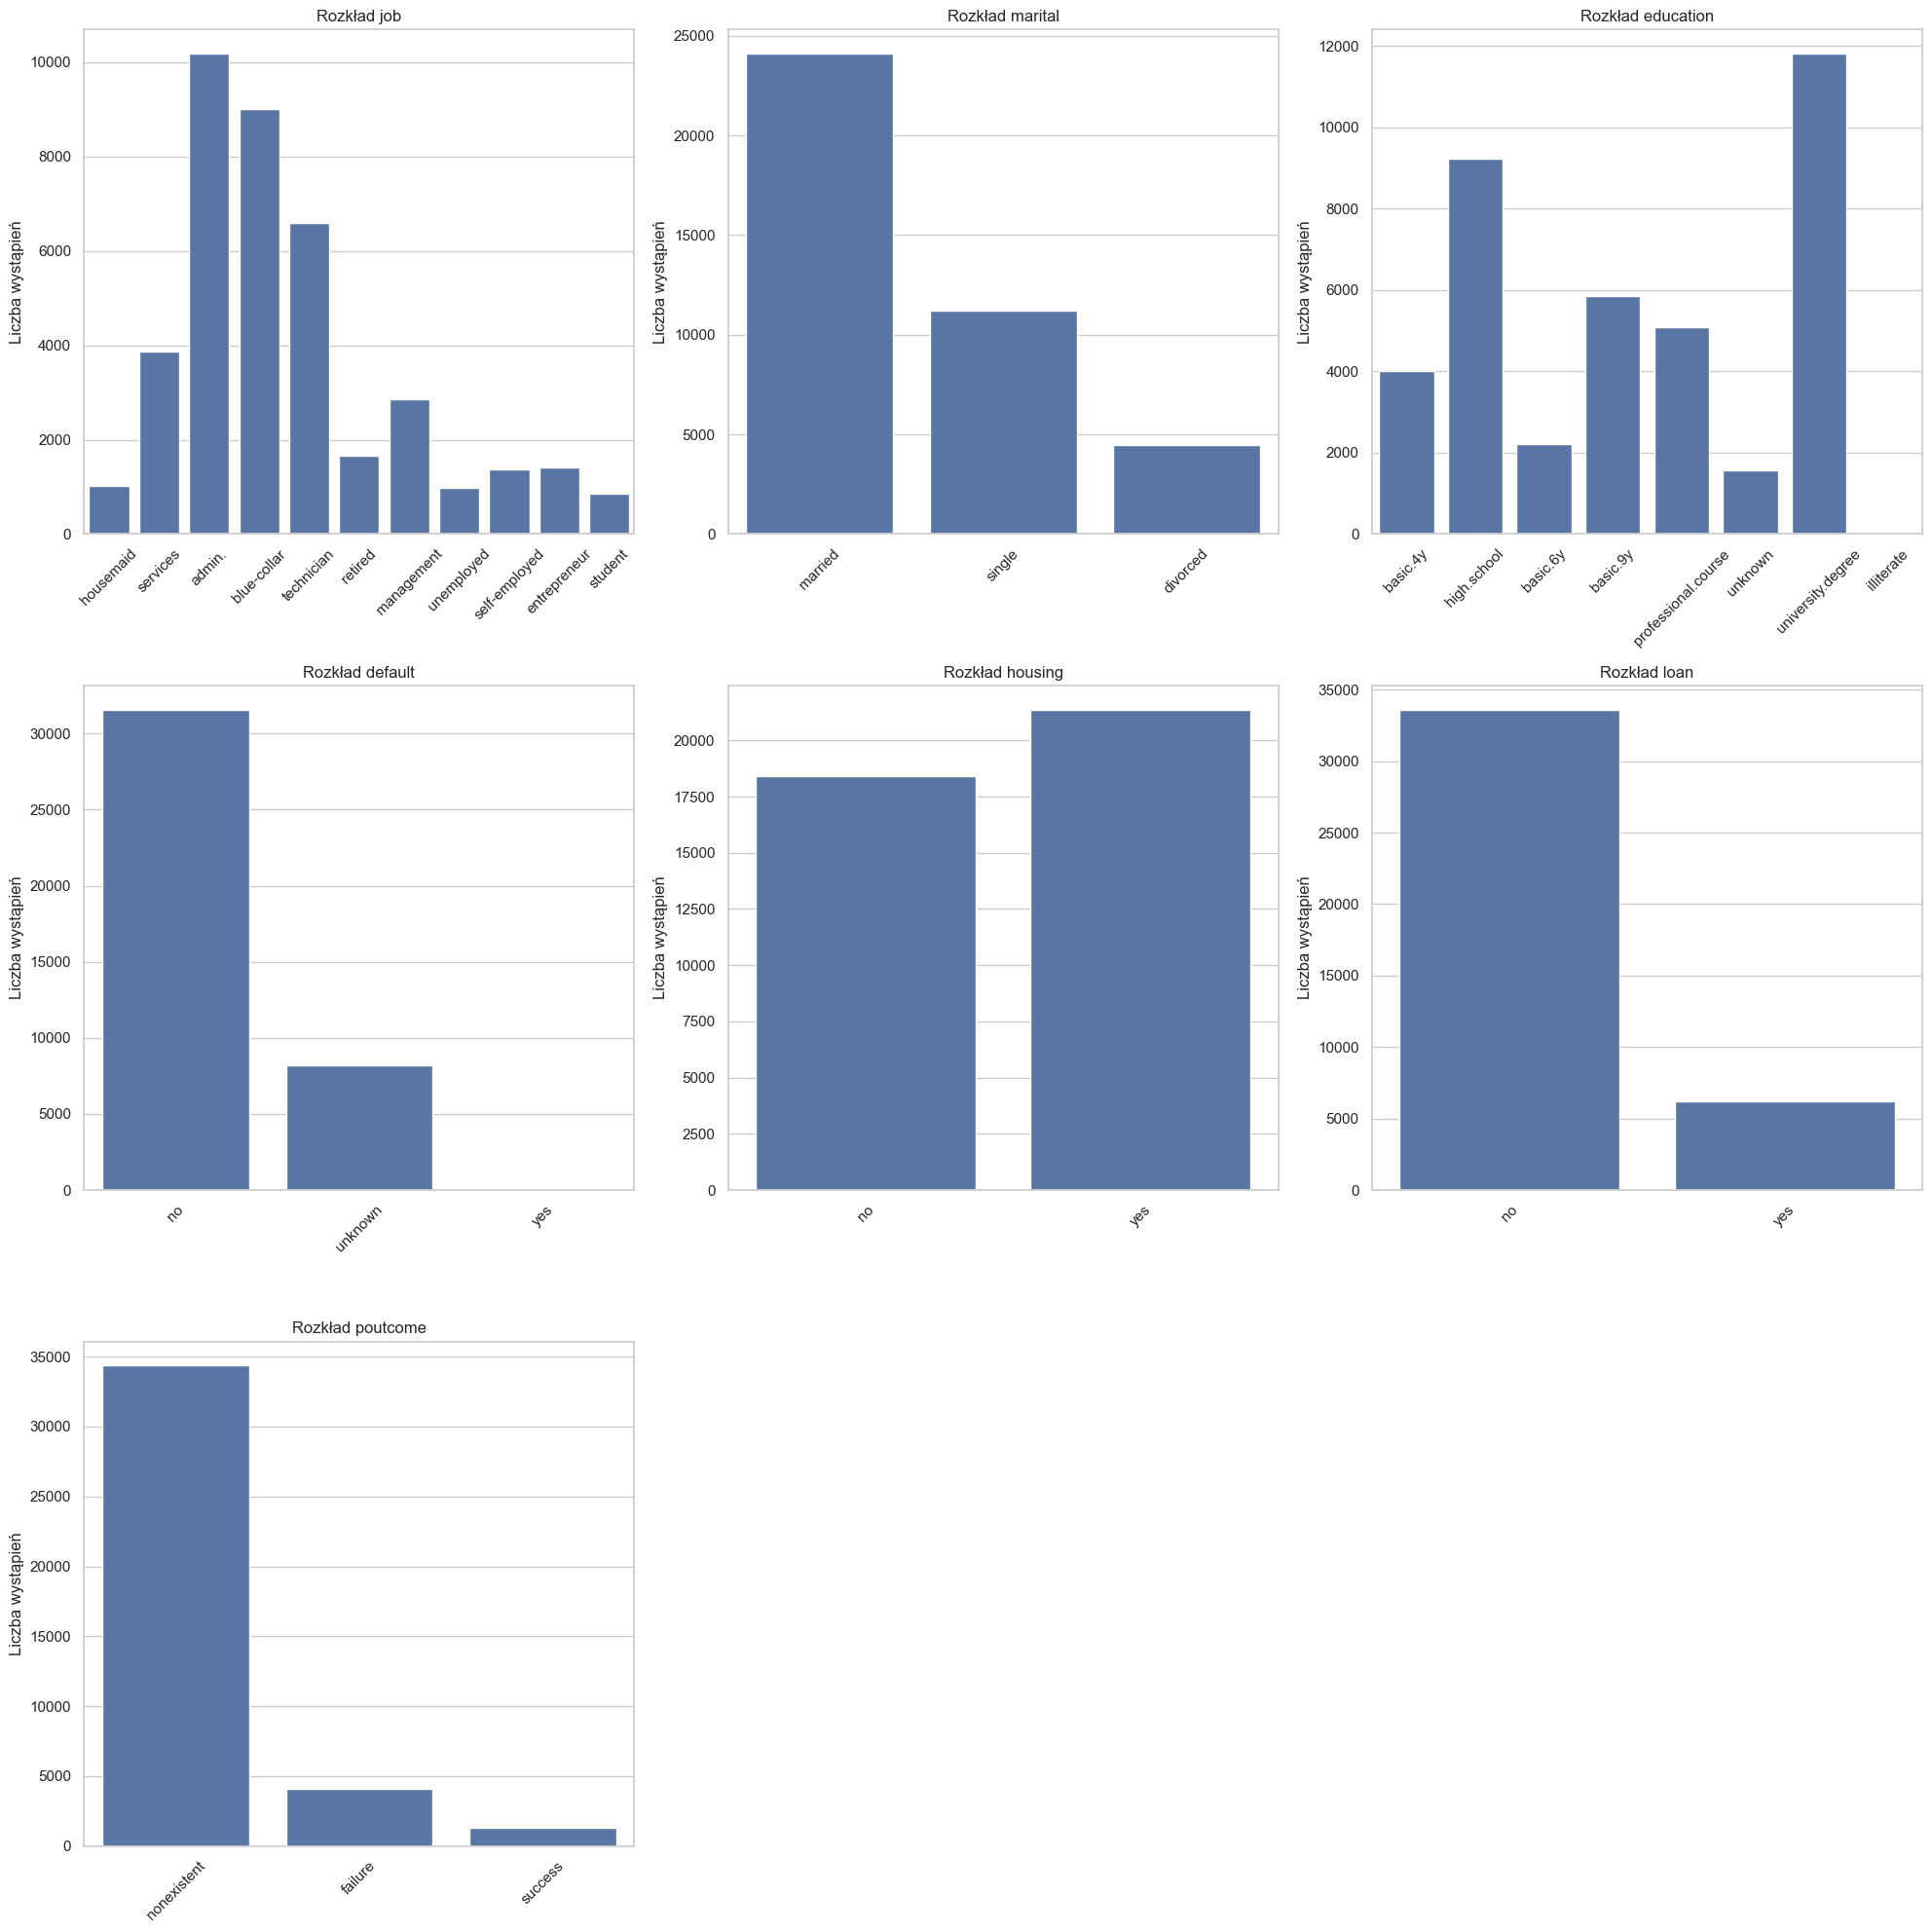

In [8]:
# Usuwam te unknown, bo nie ma ich wcale duzo
df2 = df2[df2['job'] != 'unknown']
df2 = df2[df2['marital'] != 'unknown']
df2 = df2[df2['housing'] != 'unknown']

# Z niektorych zmiennych kategorycznych nie chce na razie korzystac
columns_to_drop = ['day_of_week', 'month', 'contact']
df2 = df2.drop(columns=columns_to_drop)

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Liczenie wartości 'unknown' w każdej zmiennej kategorycznej
unknown_counts = {}
for col in categorical_columns:
    unknown_count = df2[col].value_counts().get('unknown', 0)
    unknown_counts[col] = unknown_count

# Wyświetlenie liczby 'unknown' dla każdej zmiennej kategorycznej
for col, count in unknown_counts.items():
    print(f"{col}: {count} 'unknown'")

# Ustawienie stylu wykresów
sb.set_theme(style="whitegrid")

num_categorical = len(categorical_columns)

# Ustalenie rozmiaru siatki wykresów
fig, axes = plt.subplots(nrows=(num_categorical + 2) // 3, ncols=3, figsize=(20, 20))

# Przejście przez wszystkie zmienne kategoryczne i rysowanie wykresów
for ax, col in zip(axes.flatten(), categorical_columns):
    sb.countplot(data=df2, x=col, ax=ax)
    ax.set_title(f'Rozkład {col}')
    ax.set_xlabel('')
    ax.set_ylabel('Liczba wystąpień')
    ax.tick_params(axis='x', rotation=45)

for ax in axes.flatten()[len(categorical_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

In [9]:
# One-Hot Encoding dla zmiennych kategorycznych
df3 = pd.get_dummies(df2, columns=categorical_columns)
df3

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default_no,default_unknown,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,True,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,True,False,True,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,True,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,True,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,True,True,False,False,True,False
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,True,False,True,False,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,True,True,False,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,True,False,True,False,False,True,False


In [10]:
# false -> 0, true -> 1
df4 = df3.map(lambda x: 1 if x == True else (0 if x == False else x))

# Normalizacja zmiennych numerycznych
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range=(0, 1))
df4[numeric_columns] = scaler.fit_transform(df4[numeric_columns])

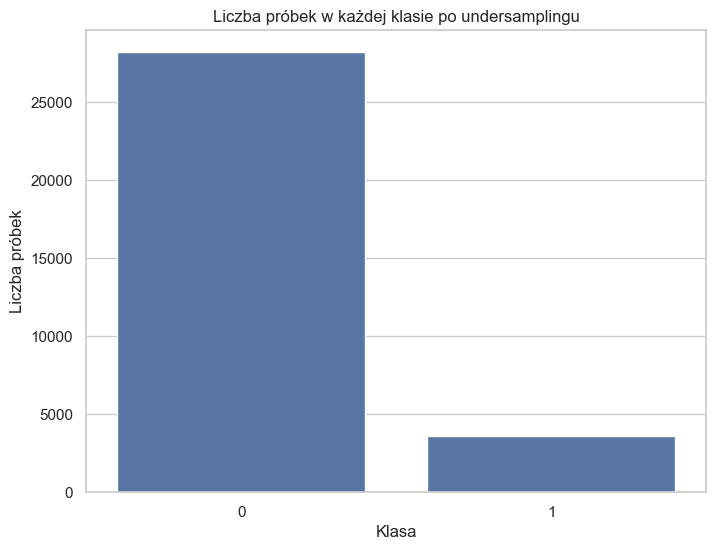

In [11]:
# podział na zbiór treningowy i testowy

x = df4.drop(columns=['y'])
y = df4['y']

# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

class_counts = y_train.value_counts()

# Tworzenie wykresu słupkowego do sprawdzenia jak dobry undersampling wyszedl
plt.figure(figsize=(8, 6))
sb.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Liczba próbek w każdej klasie po undersamplingu')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

Widać, że jest zbyt dużo na tak

SVC:
Dokładność: 0.90
Jaccard: 0.18
F1-score: 0.31
ROC AUC: 0.92
Precyzja: 0.69
Czułość (Recall): 0.20
Log Loss: 0.27
MCC: 0.34
Balanced Accuracy: 0.59
Specificity: 0.99
F2-score: 0.23
G-Mean: 0.44



 Confusion Matrix:
[[7014   77]
 [ 695  173]]


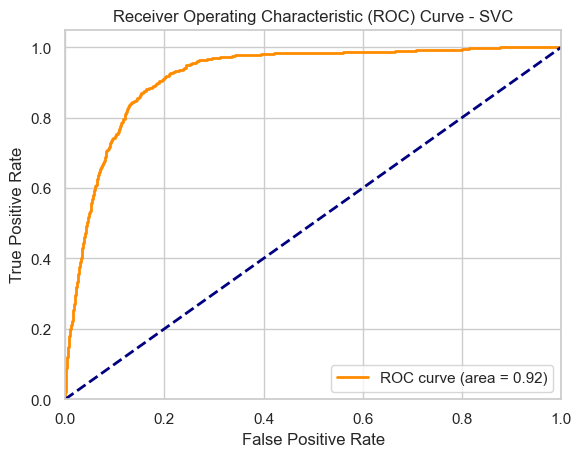

In [12]:
# Trenowanie modelu SVC
svm = SVC(random_state=42, probability=True)
svm.fit(x_train, y_train)

# Predykcje na zbiorze testowym
y_pred_svm = svm.predict(x_test)
y_pred_svm_proba = svm.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_svm = accuracy_score(y_test, y_pred_svm)
jaccard_svm = jaccard_score(y_test, y_pred_svm, pos_label=1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)
log_loss_svm = log_loss(y_test, y_pred_svm_proba)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
balanced_accuracy_svm = balanced_accuracy_score(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
f2_svm = fbeta_score(y_test, y_pred_svm, beta=2, pos_label=1)
gmean_svm = (recall_svm * specificity_svm) ** 0.5

# Wyświetlanie wyników
print("SVC:")
print(f"Dokładność: {accuracy_svm:.2f}")
print(f"Jaccard: {jaccard_svm:.2f}")
print(f"F1-score: {f1_svm:.2f}")
print(f"ROC AUC: {roc_auc_svm:.2f}")
print(f"Precyzja: {precision_svm:.2f}")
print(f"Czułość (Recall): {recall_svm:.2f}")
print(f"Log Loss: {log_loss_svm:.2f}")
print(f"MCC: {mcc_svm:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_svm:.2f}")
print(f"Specificity: {specificity_svm:.2f}")
print(f"F2-score: {f2_svm:.2f}")
print(f"G-Mean: {gmean_svm:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_svm)

# Krzywa ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba, pos_label=1)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.show()

Random Forest:
Dokładność: 0.91
Jaccard: 0.37
F1-score: 0.54
ROC AUC: 0.94
Precyzja: 0.65
Czułość (Recall): 0.47
Log Loss: 0.21
MCC: 0.51
Balanced Accuracy: 0.72
Specificity: 0.97
F2-score: 0.49
G-Mean: 0.67



 Confusion Matrix:
[[6876  215]
 [ 463  405]]


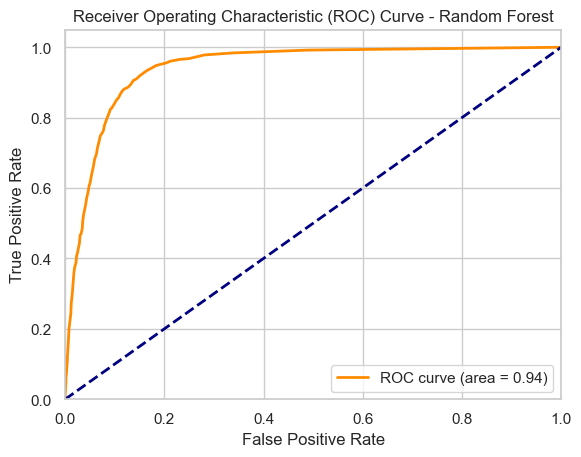

In [13]:
# Trenowanie modelu Random forest_res Classifier
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

# Predykcje na zbiorze testowym
y_pred_forest = forest.predict(x_test)
y_pred_forest_proba = forest.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_forest = accuracy_score(y_test, y_pred_forest)
jaccard_forest = jaccard_score(y_test, y_pred_forest, pos_label=1)
f1_forest = f1_score(y_test, y_pred_forest, pos_label=1)
roc_auc_forest = roc_auc_score(y_test, y_pred_forest_proba)
precision_forest = precision_score(y_test, y_pred_forest, pos_label=1)
recall_forest = recall_score(y_test, y_pred_forest, pos_label=1)
log_loss_forest = log_loss(y_test, y_pred_forest_proba)
mcc_forest = matthews_corrcoef(y_test, y_pred_forest)
balanced_accuracy_forest = balanced_accuracy_score(y_test, y_pred_forest)
tn_forest, fp_forest, fn_forest, tp_forest = confusion_matrix(y_test, y_pred_forest).ravel()
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
specificity_forest = tn_forest / (tn_forest + fp_forest)
f2_forest = fbeta_score(y_test, y_pred_forest, beta=2, pos_label=1)
gmean_forest = (recall_forest * specificity_forest) ** 0.5


# Wyświetlanie wyników
print("Random Forest:")
print(f"Dokładność: {accuracy_forest:.2f}")
print(f"Jaccard: {jaccard_forest:.2f}")
print(f"F1-score: {f1_forest:.2f}")
print(f"ROC AUC: {roc_auc_forest:.2f}")
print(f"Precyzja: {precision_forest:.2f}")
print(f"Czułość (Recall): {recall_forest:.2f}")
print(f"Log Loss: {log_loss_forest:.2f}")
print(f"MCC: {mcc_forest:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_forest:.2f}")
print(f"Specificity: {specificity_forest:.2f}")
print(f"F2-score: {f2_forest:.2f}")
print(f"G-Mean: {gmean_forest:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_forest)

# Krzywa ROC
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_forest_proba, pos_label=1)
plt.figure()
plt.plot(fpr_forest, tpr_forest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


Log Regresion:
Dokładność: 0.91
Jaccard: 0.30
F1-score: 0.46
ROC AUC: 0.92
Precyzja: 0.66
Czułość (Recall): 0.36
Log Loss: 0.22
MCC: 0.44
Balanced Accuracy: 0.67
Specificity: 0.98
F2-score: 0.40
G-Mean: 0.59



 Confusion Matrix:
[[6928  163]
 [ 556  312]]


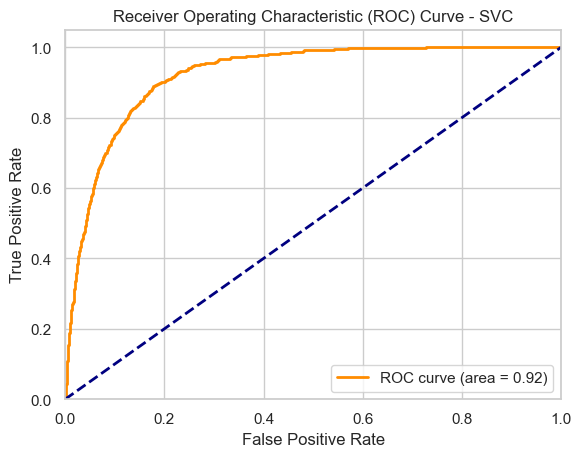

In [14]:
# Trenowanie modelu Log Regresja
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

# Predykcje na zbiorze testowym
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg_proba = logreg.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
jaccard_logreg = jaccard_score(y_test, y_pred_logreg, pos_label=1)
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label=1)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)
precision_logreg = precision_score(y_test, y_pred_logreg, pos_label=1)
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label=1)
log_loss_logreg = log_loss(y_test, y_pred_logreg_proba)
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
balanced_accuracy_logreg = balanced_accuracy_score(y_test, y_pred_logreg)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = confusion_matrix(y_test, y_pred_logreg).ravel()
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
specificity_logreg = tn_logreg / (tn_logreg + fp_logreg)
f2_logreg = fbeta_score(y_test, y_pred_logreg, beta=2, pos_label=1)
gmean_logreg = (recall_logreg * specificity_logreg) ** 0.5

# Wyświetlanie wyników
print("Log Regresion:")
print(f"Dokładność: {accuracy_logreg:.2f}")
print(f"Jaccard: {jaccard_logreg:.2f}")
print(f"F1-score: {f1_logreg:.2f}")
print(f"ROC AUC: {roc_auc_logreg:.2f}")
print(f"Precyzja: {precision_logreg:.2f}")
print(f"Czułość (Recall): {recall_logreg:.2f}")
print(f"Log Loss: {log_loss_logreg:.2f}")
print(f"MCC: {mcc_logreg:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_logreg:.2f}")
print(f"Specificity: {specificity_logreg:.2f}")
print(f"F2-score: {f2_logreg:.2f}")
print(f"G-Mean: {gmean_logreg:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_logreg)

# Krzywa ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba, pos_label=1)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.show()

Wyniki przed undersamplingiem 

In [15]:
# Słownik wynikamów
results = {
    'Random Forest': {
        'Accuracy': accuracy_forest,
        'Jaccard': jaccard_forest,
        'F1-score': f1_forest,
        'ROC AUC': roc_auc_forest,
        'Precision': precision_forest,
        'Recall': recall_forest,
        'Log Loss': log_loss_forest,
        'MCC': mcc_forest,
        'Balanced Accuracy': balanced_accuracy_forest,
        'Specificity': specificity_forest,
        'F2-score': f2_forest,
        'G-Mean': gmean_forest,
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Jaccard': jaccard_svm,
        'F1-score': f1_svm,
        'ROC AUC': roc_auc_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'Log Loss': log_loss_svm,
        'MCC': mcc_svm,
        'Balanced Accuracy': balanced_accuracy_svm,
        'Specificity': specificity_svm,
        'F2-score': f2_svm,
        'G-Mean': gmean_svm,
    },
    'Logistic Regression': {
        'Accuracy': accuracy_logreg,
        'Jaccard': jaccard_logreg,
        'F1-score': f1_logreg,
        'ROC AUC': roc_auc_logreg,
        'Precision': precision_logreg,
        'Recall': recall_logreg,
        'Log Loss': log_loss_logreg,
        'MCC': mcc_logreg,
        'Balanced Accuracy': balanced_accuracy_logreg,
        'Specificity': specificity_logreg,
        'F2-score': f2_logreg,
        'G-Mean': gmean_logreg,
    }
}

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)
print(results_df)


                   Random Forest       SVM  Logistic Regression
Accuracy                0.914813  0.903003             0.909662
Jaccard                 0.373961  0.183069             0.302619
F1-score                0.544355  0.309481             0.464631
ROC AUC                 0.940391  0.920841             0.923201
Precision               0.653226  0.692000             0.656842
Recall                  0.466590  0.199309             0.359447
Log Loss                0.205730  0.266596             0.215523
MCC                     0.507405  0.336776             0.442724
Balanced Accuracy       0.718135  0.594225             0.668230
Specificity             0.969680  0.989141             0.977013
F2-score                0.494868  0.232402             0.395237
G-Mean                  0.672639  0.444010             0.592608


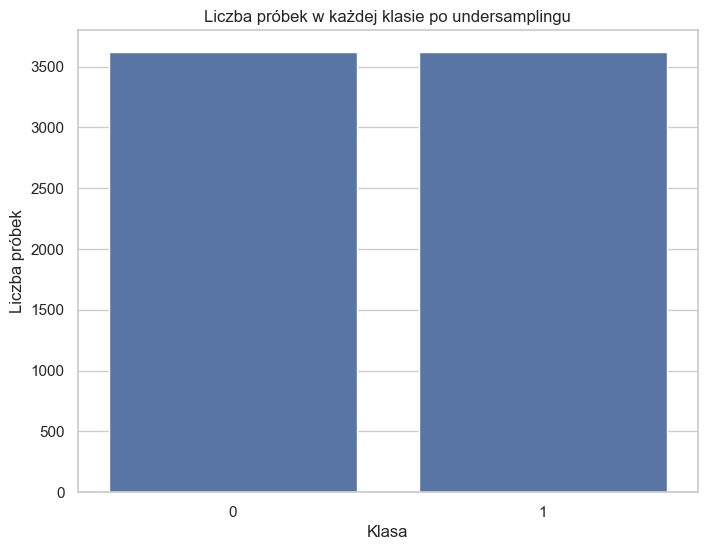

In [16]:
# Undersampling za pomocą imlearn

rus = RandomUnderSampler(random_state=42)
x_train_res, y_train_res = rus.fit_resample(x_train, y_train)

class_counts = y_train_res.value_counts()

# Tworzenie wykresu słupkowego do sprawdzenia jak dobry undersampling wyszedl
plt.figure(figsize=(8, 6))
sb.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Liczba próbek w każdej klasie po undersamplingu')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()


Log Regresion:
Dokładność: 0.85
Jaccard: 0.38
F1-score: 0.56
ROC AUC: 0.92
Precyzja: 0.41
Czułość (Recall): 0.85
Log Loss: 0.38
MCC: 0.52
Balanced Accuracy: 0.85
Specificity: 0.85
F2-score: 0.70
G-Mean: 0.85



 Confusion Matrix:
[[6046 1045]
 [ 133  735]]


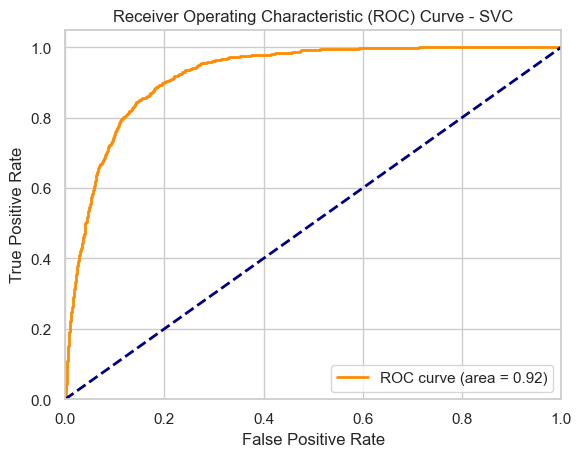

In [17]:
# Trenowanie modelu Log Regresja po undersamplingu!
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train_res, y_train_res)

# Predykcje na zbiorze testowym
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg_proba = logreg.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
jaccard_logreg = jaccard_score(y_test, y_pred_logreg, pos_label=1)
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label=1)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_proba)
precision_logreg = precision_score(y_test, y_pred_logreg, pos_label=1)
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label=1)
log_loss_logreg = log_loss(y_test, y_pred_logreg_proba)
mcc_logreg = matthews_corrcoef(y_test, y_pred_logreg)
balanced_accuracy_logreg = balanced_accuracy_score(y_test, y_pred_logreg)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = confusion_matrix(y_test, y_pred_logreg).ravel()
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
specificity_logreg = tn_logreg / (tn_logreg + fp_logreg)
f2_logreg = fbeta_score(y_test, y_pred_logreg, beta=2, pos_label=1)
gmean_logreg = (recall_logreg * specificity_logreg) ** 0.5

# Wyświetlanie wyników
print("Log Regresion:")
print(f"Dokładność: {accuracy_logreg:.2f}")
print(f"Jaccard: {jaccard_logreg:.2f}")
print(f"F1-score: {f1_logreg:.2f}")
print(f"ROC AUC: {roc_auc_logreg:.2f}")
print(f"Precyzja: {precision_logreg:.2f}")
print(f"Czułość (Recall): {recall_logreg:.2f}")
print(f"Log Loss: {log_loss_logreg:.2f}")
print(f"MCC: {mcc_logreg:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_logreg:.2f}")
print(f"Specificity: {specificity_logreg:.2f}")
print(f"F2-score: {f2_logreg:.2f}")
print(f"G-Mean: {gmean_logreg:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_logreg)

# Krzywa ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba, pos_label=1)
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.show()

Random Forest:
Dokładność: 0.86
Jaccard: 0.41
F1-score: 0.58
ROC AUC: 0.94
Precyzja: 0.42
Czułość (Recall): 0.92
Log Loss: 0.34
MCC: 0.56
Balanced Accuracy: 0.88
Specificity: 0.85
F2-score: 0.75
G-Mean: 0.88



 Confusion Matrix:
[[6007 1084]
 [  68  800]]


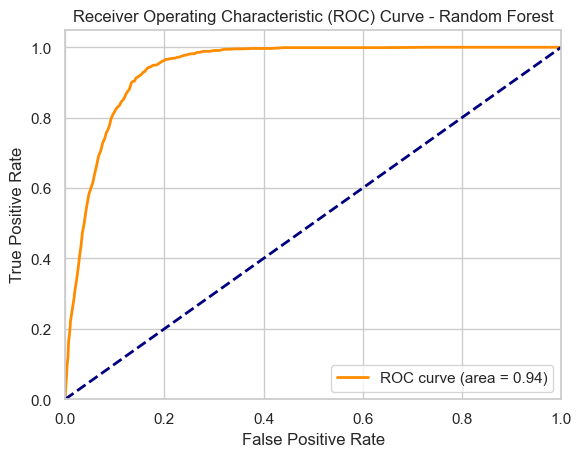

In [18]:
# Trenowanie modelu Random Forest Classifier
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train_res, y_train_res)

# Predykcje na zbiorze testowym
y_pred_forest = forest.predict(x_test)
y_pred_forest_proba = forest.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_forest = accuracy_score(y_test, y_pred_forest)
jaccard_forest = jaccard_score(y_test, y_pred_forest, pos_label=1)
f1_forest = f1_score(y_test, y_pred_forest, pos_label=1)
roc_auc_forest = roc_auc_score(y_test, y_pred_forest_proba)
precision_forest = precision_score(y_test, y_pred_forest, pos_label=1)
recall_forest = recall_score(y_test, y_pred_forest, pos_label=1)
log_loss_forest = log_loss(y_test, y_pred_forest_proba)
mcc_forest = matthews_corrcoef(y_test, y_pred_forest)
balanced_accuracy_forest = balanced_accuracy_score(y_test, y_pred_forest)
tn_forest, fp_forest, fn_forest, tp_forest = confusion_matrix(y_test, y_pred_forest).ravel()
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
specificity_forest = tn_forest / (tn_forest + fp_forest)
f2_forest = fbeta_score(y_test, y_pred_forest, beta=2, pos_label=1)
gmean_forest = (recall_forest * specificity_forest) ** 0.5


# Wyświetlanie wyników
print("Random Forest:")
print(f"Dokładność: {accuracy_forest:.2f}")
print(f"Jaccard: {jaccard_forest:.2f}")
print(f"F1-score: {f1_forest:.2f}")
print(f"ROC AUC: {roc_auc_forest:.2f}")
print(f"Precyzja: {precision_forest:.2f}")
print(f"Czułość (Recall): {recall_forest:.2f}")
print(f"Log Loss: {log_loss_forest:.2f}")
print(f"MCC: {mcc_forest:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_forest:.2f}")
print(f"Specificity: {specificity_forest:.2f}")
print(f"F2-score: {f2_forest:.2f}")
print(f"G-Mean: {gmean_forest:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_forest)

# Krzywa ROC
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_forest_proba, pos_label=1)
plt.figure()
plt.plot(fpr_forest, tpr_forest, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


SVC:
Dokładność: 0.82
Jaccard: 0.34
F1-score: 0.50
ROC AUC: 0.91
Precyzja: 0.36
Czułość (Recall): 0.83
Log Loss: 0.42
MCC: 0.47
Balanced Accuracy: 0.83
Specificity: 0.82
F2-score: 0.66
G-Mean: 0.83



 Confusion Matrix:
[[5817 1274]
 [ 145  723]]


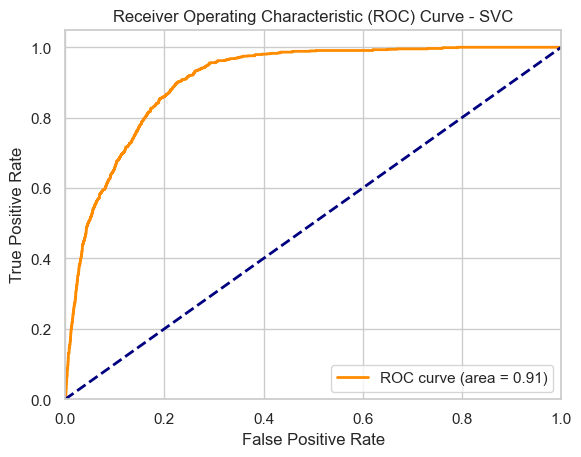

In [19]:
# Trenowanie modelu SVC
svm = SVC(random_state=42, probability=True)
svm.fit(x_train_res, y_train_res)

# Predykcje na zbiorze testowym
y_pred_svm = svm.predict(x_test)
y_pred_svm_proba = svm.predict_proba(x_test)[:, 1]

# Obliczanie wskaźników
accuracy_svm = accuracy_score(y_test, y_pred_svm)
jaccard_svm = jaccard_score(y_test, y_pred_svm, pos_label=1)
f1_svm = f1_score(y_test, y_pred_svm, pos_label=1)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm_proba)
precision_svm = precision_score(y_test, y_pred_svm, pos_label=1)
recall_svm = recall_score(y_test, y_pred_svm, pos_label=1)
log_loss_svm = log_loss(y_test, y_pred_svm_proba)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
balanced_accuracy_svm = balanced_accuracy_score(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
f2_svm = fbeta_score(y_test, y_pred_svm, beta=2, pos_label=1)
gmean_svm = (recall_svm * specificity_svm) ** 0.5

# Wyświetlanie wyników
print("SVC:")
print(f"Dokładność: {accuracy_svm:.2f}")
print(f"Jaccard: {jaccard_svm:.2f}")
print(f"F1-score: {f1_svm:.2f}")
print(f"ROC AUC: {roc_auc_svm:.2f}")
print(f"Precyzja: {precision_svm:.2f}")
print(f"Czułość (Recall): {recall_svm:.2f}")
print(f"Log Loss: {log_loss_svm:.2f}")
print(f"MCC: {mcc_svm:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy_svm:.2f}")
print(f"Specificity: {specificity_svm:.2f}")
print(f"F2-score: {f2_svm:.2f}")
print(f"G-Mean: {gmean_svm:.2f}")

print("\n\n\n Confusion Matrix:")
print(conf_matrix_svm)

# Krzywa ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba, pos_label=1)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVC')
plt.legend(loc="lower right")
plt.show()

Wyniki po undersamplingu

In [20]:
# Słownik wynikamów
results_res = {
    'Random Forest': {
        'Accuracy': accuracy_forest,
        'Jaccard': jaccard_forest,
        'F1-score': f1_forest,
        'ROC AUC': roc_auc_forest,
        'Precision': precision_forest,
        'Recall': recall_forest,
        'Log Loss': log_loss_forest,
        'MCC': mcc_forest,
        'Balanced Accuracy': balanced_accuracy_forest,
        'Specificity': specificity_forest,
        'F2-score': f2_forest,
        'G-Mean': gmean_forest,
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Jaccard': jaccard_svm,
        'F1-score': f1_svm,
        'ROC AUC': roc_auc_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'Log Loss': log_loss_svm,
        'MCC': mcc_svm,
        'Balanced Accuracy': balanced_accuracy_svm,
        'Specificity': specificity_svm,
        'F2-score': f2_svm,
        'G-Mean': gmean_svm,
    },
    'Logistic Regression': {
        'Accuracy': accuracy_logreg,
        'Jaccard': jaccard_logreg,
        'F1-score': f1_logreg,
        'ROC AUC': roc_auc_logreg,
        'Precision': precision_logreg,
        'Recall': recall_logreg,
        'Log Loss': log_loss_logreg,
        'MCC': mcc_logreg,
        'Balanced Accuracy': balanced_accuracy_logreg,
        'Specificity': specificity_logreg,
        'F2-score': f2_logreg,
        'G-Mean': gmean_logreg,
    }
}

# Tworzenie DataFrame z wynikami
results_df_res = pd.DataFrame(results_res)
print("Wyniki po undersamplingu")
print(results_df_res)


Wyniki po undersamplingu
                   Random Forest       SVM  Logistic Regression
Accuracy                0.855258  0.821711             0.851991
Jaccard                 0.409836  0.337535             0.384213
F1-score                0.581395  0.504712             0.555136
ROC AUC                 0.941082  0.907526             0.923040
Precision               0.424628  0.362043             0.412921
Recall                  0.921659  0.832949             0.846774
Log Loss                0.343826  0.418960             0.381014
MCC                     0.563777  0.469712             0.523206
Balanced Accuracy       0.884395  0.826642             0.849702
Specificity             0.847130  0.820336             0.852630
F2-score                0.746826  0.660998             0.699733
G-Mean                  0.883609  0.826618             0.849697


In [21]:
print("Wyniki przed undersamplingiem")
print(results_df)

Wyniki przed undersamplingiem
                   Random Forest       SVM  Logistic Regression
Accuracy                0.914813  0.903003             0.909662
Jaccard                 0.373961  0.183069             0.302619
F1-score                0.544355  0.309481             0.464631
ROC AUC                 0.940391  0.920841             0.923201
Precision               0.653226  0.692000             0.656842
Recall                  0.466590  0.199309             0.359447
Log Loss                0.205730  0.266596             0.215523
MCC                     0.507405  0.336776             0.442724
Balanced Accuracy       0.718135  0.594225             0.668230
Specificity             0.969680  0.989141             0.977013
F2-score                0.494868  0.232402             0.395237
G-Mean                  0.672639  0.444010             0.592608
